# MFCC de Sinais de Voz

## Bibliotecas

In [62]:
import IPython.display   as display
import matplotlib.pyplot as plt
import numpy             as np

import librosa

from scipy.io  import wavfile
from scipy.fft import dct

1. Carregue os 2 sinais de áudio e gere os gráficos destes sinais

Carregando os áudios

In [63]:
yes_sample_rate, yes_audio = wavfile.read("sim.wav")
no_sample_rate,  no_audio  = wavfile.read("nao.wav")

Calculando a duração dos áudios

In [64]:
audio_sample_rate   = yes_sample_rate

audio_len           = len(yes_audio)
audio_duration      = audio_len / audio_sample_rate
audio_duration_axis = np.linspace(0, audio_duration, audio_len) 

In [65]:
display.Audio(data = yes_audio, rate = yes_sample_rate)

In [66]:
display.Audio(data = no_audio, rate = no_sample_rate)

Calculando o aspectro de frequências dos áudios

In [67]:
frequencies_axis = np.linspace(-np.pi, np.pi, audio_len)

In [68]:
yes_ftt = np.fft.fft(yes_audio)
yes_ftt = np.fft.fftshift(yes_ftt)

yes_ftt_abs = np.abs(yes_ftt) 
yes_ftt_abs_db = 20 * np.log10(yes_ftt_abs)

In [69]:
no_ftt = np.fft.fft(no_audio)
no_ftt = np.fft.fftshift(no_ftt)

no_ftt_abs = np.abs(no_ftt) 
no_ftt_abs_db = 20 * np.log10(no_ftt_abs)

Verificando os resultados

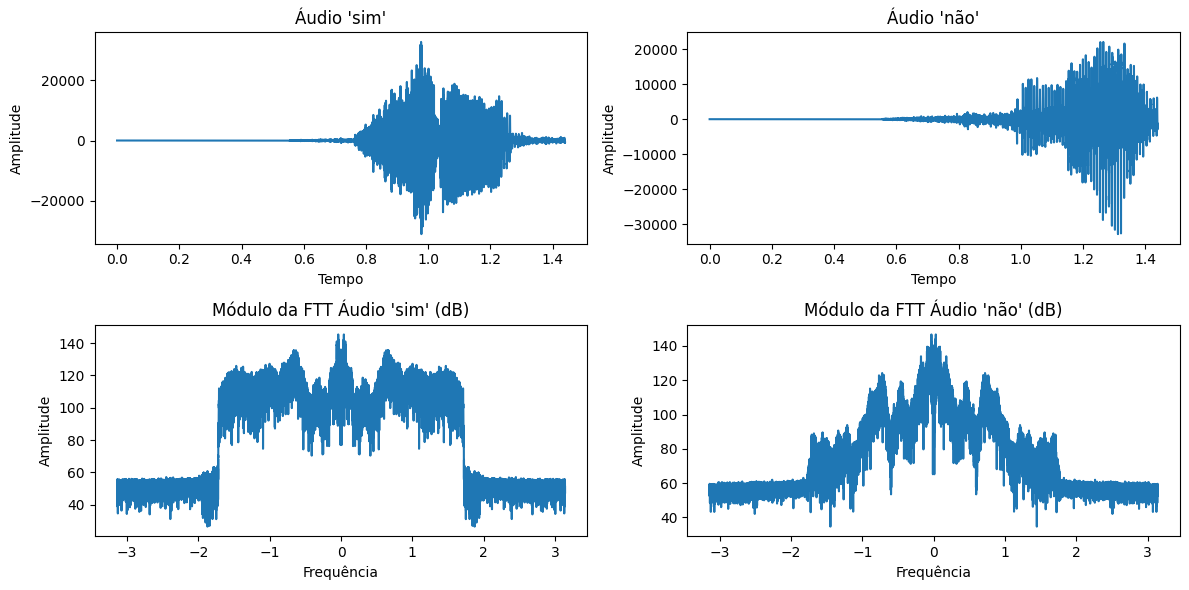

In [70]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(audio_duration_axis, yes_audio)
axis[0, 0].set_title("Áudio 'sim'")
axis[0, 0].set_xlabel("Tempo")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(audio_duration_axis, no_audio)
axis[0, 1].set_title("Áudio 'não'")
axis[0, 1].set_xlabel("Tempo")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frequencies_axis, yes_ftt_abs_db)
axis[1, 0].set_title("Módulo da FTT Áudio 'sim' (dB)")
axis[1, 0].set_xlabel("Frequência")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frequencies_axis, no_ftt_abs_db)
axis[1, 1].set_title("Módulo da FTT Áudio 'não' (dB)")
axis[1, 1].set_xlabel("Frequência")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

A partir dos gráficos no domínio do tempo, é possível observar que os sinais de voz apresentam comportamento não estacionário, típico de sinais de fala, com variações significativas de amplitude ao longo do tempo. Essas variações estão associadas às diferentes articulações da fala durante a pronúncia das palavras "sim" e "não".

No domínio da frequência, os espectros mostram que a maior parte da energia dos sinais está concentrada nas baixas frequências, o que é característico da voz humana, uma vez que o trato vocal atua como um filtro passa-baixas natural


2. Filtre os sinais com um filtro de Pré-ênfase usando ɑ=0,95. Além disso, você deve uniformizar o tamanho dos sinais, de forma que os 2 sinais tenham a mesma duração (truncando ou acrescentando zeros ao final). Gere os gráficos dos sinais filtrados. Não usar função pronta para esta filtragem.

Os dois áudios já tem o mesmo tamanho. Por isso, não é preciso uniformizar

In [71]:
print("Tamanho do áudio 'sim':", len(yes_audio))
print("Tamanho do áudio 'não':", len(no_audio))

Tamanho do áudio 'sim': 63488
Tamanho do áudio 'não': 63488


Projetando o filtro de pré-ênfase

In [72]:
alpha = 0.95

In [73]:
def pre_emphasis_filter(signal, alpha):
    filtered_signal = np.zeros_like(signal)

    filtered_signal[0] = signal[0]

    for i in range(1, len(signal)):
        filtered_signal[i] = signal[i] - alpha * signal[i - 1]

    return filtered_signal

Filtrando os áudios

In [74]:
yes_filtered =  pre_emphasis_filter(yes_audio, alpha)
no_filtered =  pre_emphasis_filter(no_audio, alpha)

In [75]:
display.Audio(data = yes_filtered, rate = yes_sample_rate)

In [76]:
display.Audio(data = no_filtered, rate = yes_sample_rate)

Calculando a FFT dos áudios filtrados

In [77]:
yes_filtered_ftt = np.fft.fft(yes_filtered)
yes_filtered_ftt = np.fft.fftshift(yes_filtered_ftt)

yes_filtered_ftt_abs = np.abs(yes_filtered_ftt) 
yes_filtered_ftt_abs_db = 20 * np.log10(yes_filtered_ftt_abs)

In [78]:
no_filtered_ftt = np.fft.fft(no_filtered)
no_filtered_ftt = np.fft.fftshift(no_filtered_ftt)

no_filtered_ftt_abs = np.abs(no_filtered_ftt) 
no_filtered_ftt_abs_db = 20 * np.log10(no_filtered_ftt_abs)

Verificando os resultados

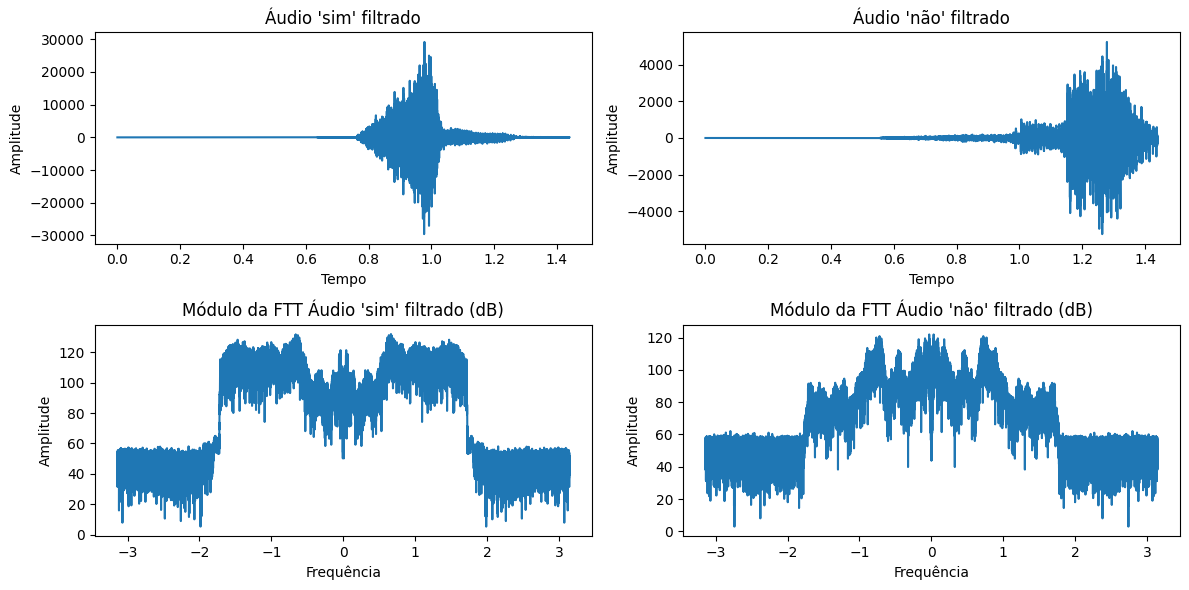

In [79]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(audio_duration_axis, yes_filtered)
axis[0, 0].set_title("Áudio 'sim' filtrado")
axis[0, 0].set_xlabel("Tempo")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(audio_duration_axis, no_filtered)
axis[0, 1].set_title("Áudio 'não' filtrado")
axis[0, 1].set_xlabel("Tempo")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frequencies_axis, yes_filtered_ftt_abs_db)
axis[1, 0].set_title("Módulo da FTT Áudio 'sim' filtrado (dB)")
axis[1, 0].set_xlabel("Frequência")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frequencies_axis, no_filtered_ftt_abs_db)
axis[1, 1].set_title("Módulo da FTT Áudio 'não' filtrado (dB)")
axis[1, 1].set_xlabel("Frequência")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

Após a aplicação do filtro de pré-ênfase com α = 0,95, observa-se uma amplificação das componentes de alta frequência dos sinais. Esse comportamento é esperado, pois o filtro de pré-ênfase tem como objetivo compensar a atenuação natural das altas frequências introduzida pelo trato vocal humano.

Essa etapa é fundamental no processamento de fala, pois realça características espectrais importantes, especialmente formantes e transições rápidas, tornando os sinais mais adequados para análises posteriores, como a extração dos MFCC.

Além disso, como os dois áudios possuem o mesmo comprimento, não foi necessário realizar truncamento ou preenchimento com zeros para uniformização da duração.


3. Remova a média dos sinais filtrados e, em seguida, divida estes sinais em quadros (frames) de 10ms cada. Os sinais foram gerados com uma frequência de amostragem Fs= 44,1 KHz. Gere o gráfico de 1 frame de cada um dos 2 sinais

Removendo a média dos sinais filtrados

In [80]:
yes_filtered = yes_filtered - np.mean(yes_filtered)

np.mean(yes_filtered)

np.float64(-1.0488026218112164e-14)

In [81]:
no_filtered = no_filtered - np.mean(no_filtered)

np.mean(no_filtered)

np.float64(-7.091101899218741e-15)

Gerando as janelas (frames)

In [82]:
frame_time_size = 10 * 10**-3 
frame_len       = int(frame_time_size * audio_sample_rate)
frames_amout    = int(audio_len / frame_len)

frame_len

441

In [83]:
yes_frames = yes_filtered[: frames_amout * frame_len]
yes_frames = yes_frames.reshape(frames_amout, frame_len)

yes_frames.shape

(143, 441)

In [84]:
no_frames = no_filtered[: frames_amout * frame_len]
no_frames = no_frames.reshape(frames_amout, frame_len)

no_frames.shape

(143, 441)

Verificando os resultados

In [85]:
frame_time_axis = np.arange(frame_len) / audio_sample_rate

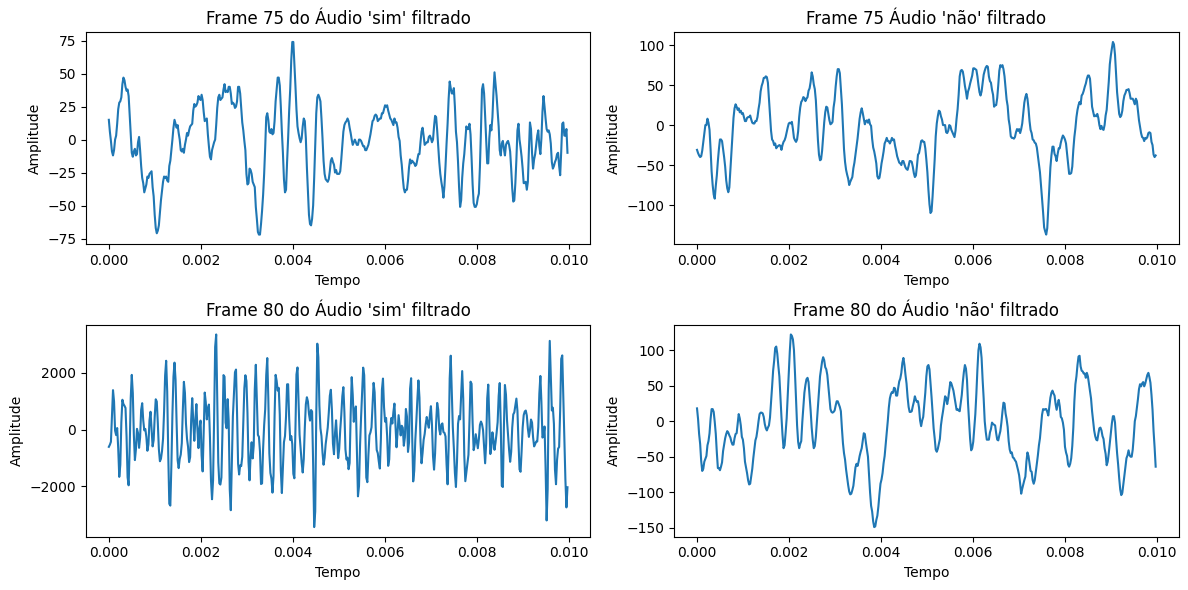

In [86]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(frame_time_axis, yes_frames[75])
axis[0, 0].set_title("Frame 75 do Áudio 'sim' filtrado")
axis[0, 0].set_xlabel("Tempo")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(frame_time_axis, no_frames[75])
axis[0, 1].set_title("Frame 75 Áudio 'não' filtrado")
axis[0, 1].set_xlabel("Tempo")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frame_time_axis, yes_frames[80])
axis[1, 0].set_title("Frame 80 do Áudio 'sim' filtrado")
axis[1, 0].set_xlabel("Tempo")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frame_time_axis, no_frames[80])
axis[1, 1].set_title("Frame 80 do Áudio 'não' filtrado")
axis[1, 1].set_xlabel("Tempo")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

Os sinais foram segmentados em frames de 10 ms, assumindo que, nesse intervalo curto, o sinal de fala pode ser considerado aproximadamente estacionário. Essa suposição é amplamente utilizada em processamento de voz e permite a aplicação consistente da Transformada de Fourier em cada frame.

Os gráficos dos frames selecionados mostram sinais com características estatísticas semelhantes dentro de cada frame, corroborando a hipótese de estacionariedade local.


4. Aplique a janela de Hamming em todos os frames obtidos e gere o gráfico de 1 frame janelado de cada um dos 2 sinais (os mesmos frames da Questão 3). É permitido usar função pronta para a obtenção da janela de Hamming

Projetando a janela

In [87]:
hamming_window = np.hamming(frame_len)

Aplicando a janela de Hamming nos frames dos áudios

In [88]:
yes_frames = yes_frames * hamming_window

In [89]:
no_frames = no_frames * hamming_window

Verificando os resultados

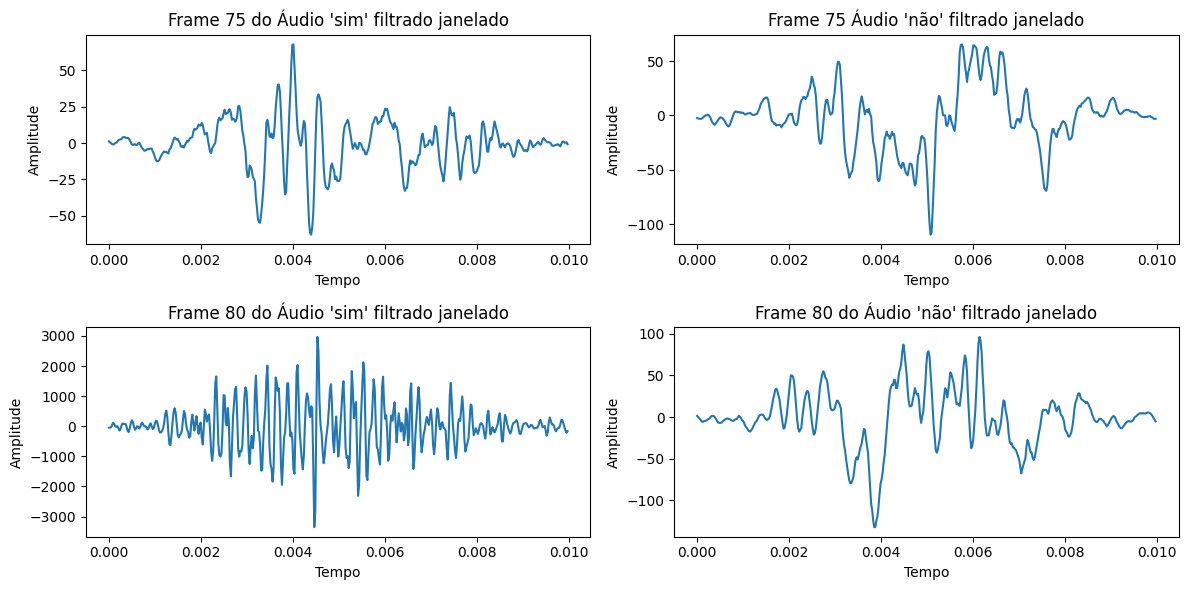

In [90]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(frame_time_axis, yes_frames[75])
axis[0, 0].set_title("Frame 75 do Áudio 'sim' filtrado janelado")
axis[0, 0].set_xlabel("Tempo")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(frame_time_axis, no_frames[75])
axis[0, 1].set_title("Frame 75 Áudio 'não' filtrado janelado")
axis[0, 1].set_xlabel("Tempo")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frame_time_axis, yes_frames[80])
axis[1, 0].set_title("Frame 80 do Áudio 'sim' filtrado janelado")
axis[1, 0].set_xlabel("Tempo")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frame_time_axis, no_frames[80])
axis[1, 1].set_title("Frame 80 do Áudio 'não' filtrado janelado")
axis[1, 1].set_xlabel("Tempo")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

A aplicação da janela de Hamming em cada frame reduz descontinuidades abruptas nas extremidades dos sinais segmentados. Sem o janelamento, essas descontinuidades introduziriam vazamento espectral na Transformada de Fourier.

Observa-se que o sinal janelado apresenta transições mais suaves nas bordas, o que resulta em uma representação espectral mais precisa e com menor influência de ruídos artificiais gerados pelo processo de segmentação.


5. Calcule o módulo ao quadrado da Transformada Discreta de Fourier (DFT) dos frames obtidos na Questão 4. Visto que o módulo ao quadrado da DFT é simétrico em relação à frequência zero, você deve eliminar as redundâncias da DFT descartando as frequências negativas. Gere o gráfico do módulo ao quadrado da DFT de 1 frame de cada um dos 2 sinais (os mesmos frames da Questão 3). O eixo x deste gráficos deve corresponder às frequências entre 0 e F s/2. É permitido usar função pronta para a DFT.

Calculando as DFT

In [91]:
yes_frames_ftt        = np.fft.fft(yes_frames, axis = 1)
yes_frames_ftt_energy = np.abs(yes_frames_ftt) ** 2

In [92]:
no_frames_ftt        = np.fft.fft(no_frames, axis = 1)
no_frames_ftt_energy = np.abs(no_frames_ftt) ** 2

Verificando os resultados

In [93]:
amout_frequencies       = frame_len // 2 + 1
frames_frequencies_axis = np.linspace(0, audio_sample_rate / 2, amout_frequencies)

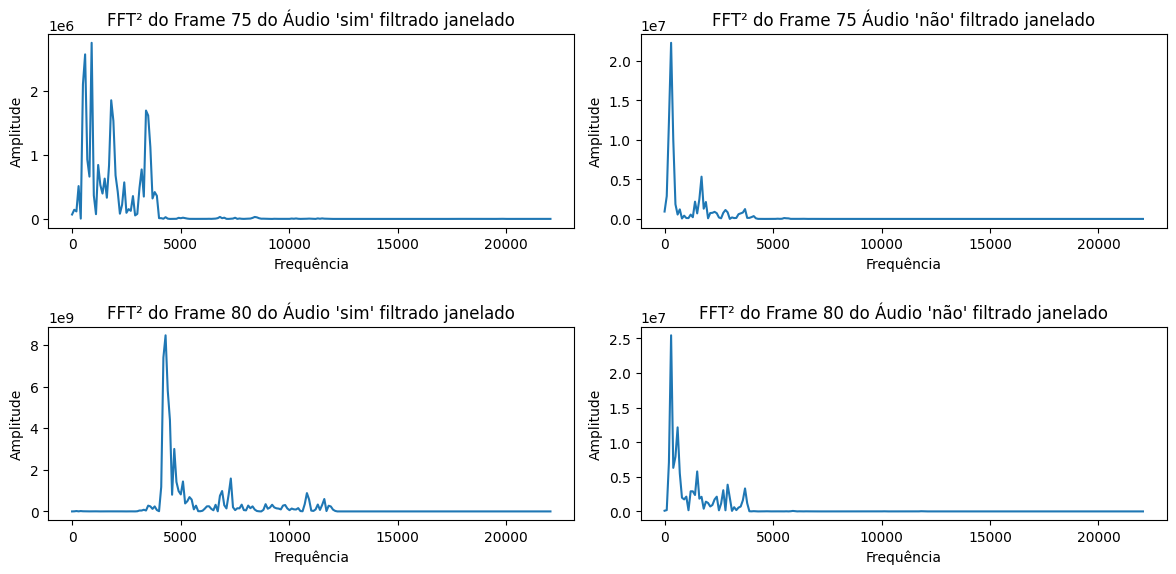

In [94]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(frames_frequencies_axis, yes_frames_ftt_energy[75, :amout_frequencies])
axis[0, 0].set_title("FFT² do Frame 75 do Áudio 'sim' filtrado janelado")
axis[0, 0].set_xlabel("Frequência")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(frames_frequencies_axis, no_frames_ftt_energy[75, :amout_frequencies])
axis[0, 1].set_title("FFT² do Frame 75 Áudio 'não' filtrado janelado")
axis[0, 1].set_xlabel("Frequência")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frames_frequencies_axis, yes_frames_ftt_energy[80, :amout_frequencies])
axis[1, 0].set_title("FFT² do Frame 80 do Áudio 'sim' filtrado janelado")
axis[1, 0].set_xlabel("Frequência")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frames_frequencies_axis, no_frames_ftt_energy[80, :amout_frequencies])
axis[1, 1].set_title("FFT² do Frame 80 do Áudio 'não' filtrado janelado")
axis[1, 1].set_xlabel("Frequência")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

O módulo ao quadrado da DFT representa a densidade espectral de energia de cada frame. Como a DFT de sinais reais é simétrica em torno da frequência zero, apenas as frequências positivas (de 0 a Fs/2) foram consideradas, eliminando redundâncias.

A análise dos gráficos mostra que a maior parte da energia continua concentrada nas baixas frequências, refletindo as propriedades físicas da produção da fala humana. Essa representação espectral servirá de base para a aplicação dos filtros da escala Mel.


6. Aplique os filtros triangulares de escala Mel nas DFTs calculadas na Questão 5. Use 40 filtros triangulares em cada DFT de cada frame. Gere o gráfico do módulo ao quadrado da DFT filtrada de 1 filtro de 1 frame de cada um dos 2 sinais (os mesmos frames da Questão 3 - escolhendo 1 dos 40 filtros). É permitido usar função pronta para os filtros triangulares de escala Mel.

Projetando os filtros MEL

In [95]:
amout_mels = 40

In [96]:
mel_filters = librosa.filters.mel(
    sr     = audio_sample_rate,
    n_fft  = frame_len,
    n_mels = amout_mels,
    fmin   = 0,
    fmax   = audio_sample_rate / 2
)

mel_filters.shape

(40, 221)

Considerando apenas a frequência positivas

In [97]:
yes_frames_ftt_energy_right = yes_frames_ftt_energy[:, :amout_frequencies]

In [98]:
no_frames_ftt_energy_right = no_frames_ftt_energy[:,  :amout_frequencies]

Verificando os resultados

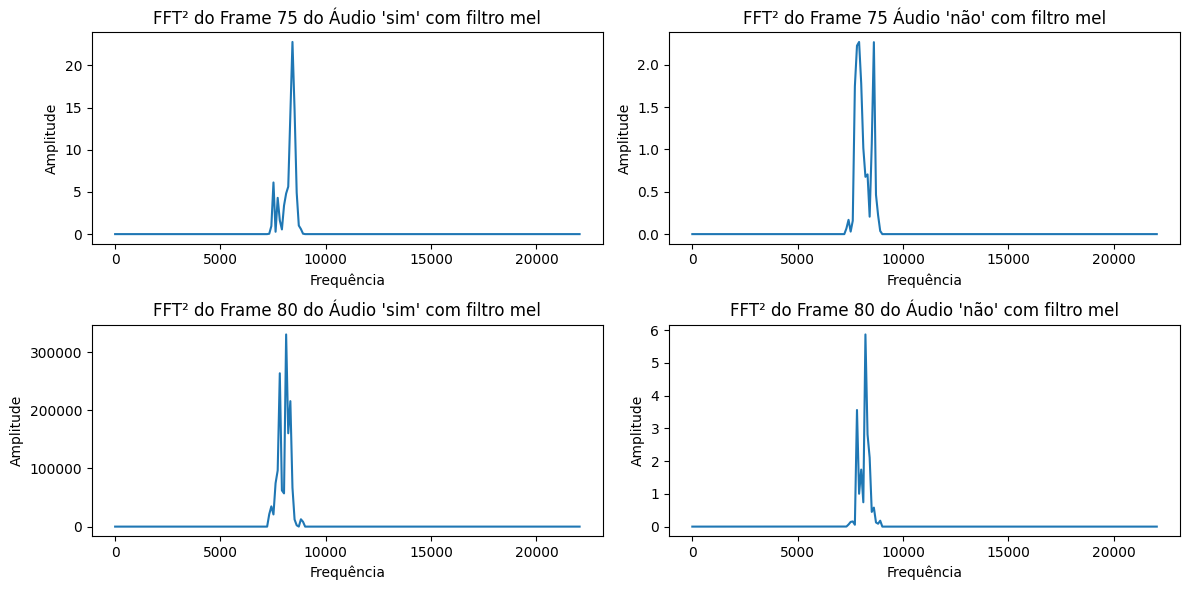

In [99]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(frames_frequencies_axis, yes_frames_ftt_energy_right[75] * mel_filters[30])
axis[0, 0].set_title("FFT² do Frame 75 do Áudio 'sim' com filtro mel")
axis[0, 0].set_xlabel("Frequência")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(frames_frequencies_axis, no_frames_ftt_energy_right[75] * mel_filters[30])
axis[0, 1].set_title("FFT² do Frame 75 Áudio 'não' com filtro mel")
axis[0, 1].set_xlabel("Frequência")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(frames_frequencies_axis, yes_frames_ftt_energy_right[80] * mel_filters[30])
axis[1, 0].set_title("FFT² do Frame 80 do Áudio 'sim' com filtro mel")
axis[1, 0].set_xlabel("Frequência")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(frames_frequencies_axis, no_frames_ftt_energy_right[80] * mel_filters[30])
axis[1, 1].set_title("FFT² do Frame 80 do Áudio 'não' com filtro mel")
axis[1, 1].set_xlabel("Frequência")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

Os filtros triangulares na escala Mel foram aplicados ao espectro de energia de cada frame com o objetivo de agrupar as componentes espectrais em bandas perceptualmente relevantes. A escala Mel modela a percepção auditiva humana, que possui maior resolução em baixas frequências e menor resolução em altas frequências.

A aplicação desses filtros reduz a dimensionalidade do espectro e diminui a correlação entre amostras adjacentes, além de enfatizar regiões espectrais importantes para a discriminação de sons de fala.


7. Calcule a energia de cada banda Mel gerada na Questão 6. Gere o gráfico da energia das bandas Mel em função dos 40 índices Mel para 1 frame de cada um dos 2 sinais (para os mesmos frames da Questão 3).

Calculando a energia de cada banda

In [100]:
yes_mel_energy = np.dot(yes_frames_ftt_energy_right, mel_filters.T)

yes_mel_energy.shape

(143, 40)

In [101]:
no_mel_energy  = np.dot(no_frames_ftt_energy_right,  mel_filters.T)

no_mel_energy.shape

(143, 40)

Verificando os resultados

In [102]:
mel_axis = np.arange(amout_mels)

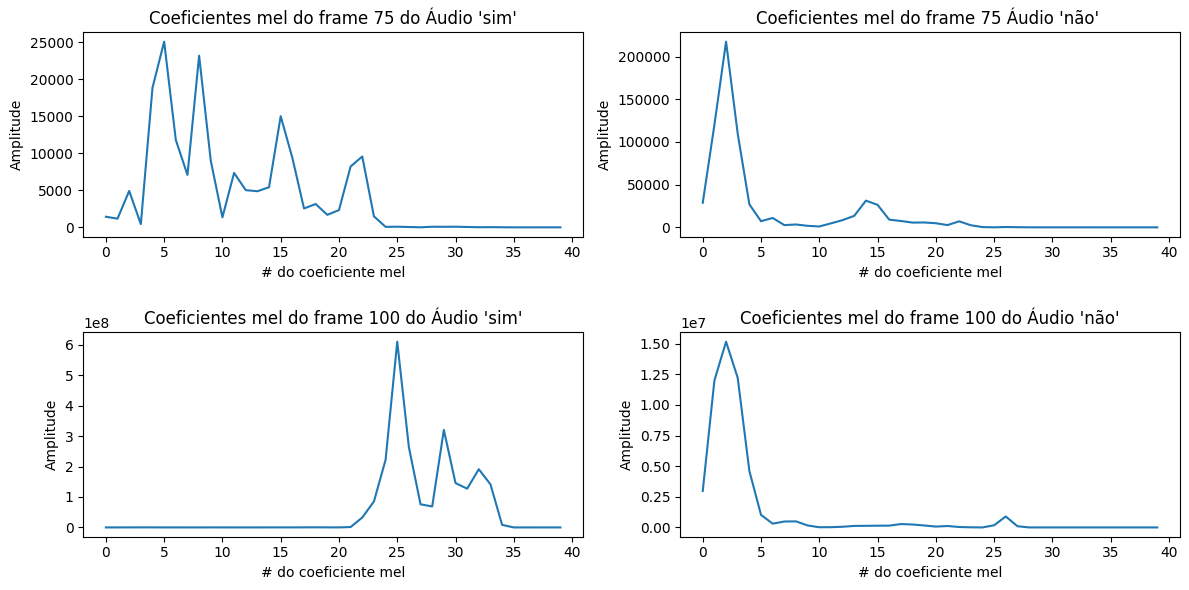

In [103]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(mel_axis, yes_mel_energy[75])
axis[0, 0].set_title("Coeficientes mel do frame 75 do Áudio 'sim'")
axis[0, 0].set_xlabel("# do coeficiente mel")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(mel_axis, no_mel_energy[75])
axis[0, 1].set_title("Coeficientes mel do frame 75 Áudio 'não' ")
axis[0, 1].set_xlabel("# do coeficiente mel")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(mel_axis, yes_mel_energy[100])
axis[1, 0].set_title("Coeficientes mel do frame 100 do Áudio 'sim'")
axis[1, 0].set_xlabel("# do coeficiente mel")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(mel_axis, no_mel_energy[100])
axis[1, 1].set_title("Coeficientes mel do frame 100 do Áudio 'não'")
axis[1, 1].set_xlabel("# do coeficiente mel")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

A energia de cada banda Mel foi obtida somando as contribuições espectrais ponderadas pelos filtros triangulares. O gráfico da energia em função do índice Mel evidencia como a energia do sinal de fala está distribuída ao longo das bandas perceptuais.

Comparando os sinais "sim" e "não", é possível observar diferenças no padrão de distribuição de energia entre as bandas Mel, indicando que essas características podem ser úteis para diferenciar os dois sinais.

8. Calcule o Logaritmo das energias Mel geradas na Questão 6. Gere o gráfico do log da energia das bandas Mel em função dos 40 índices Mel para 1 frame de cada um dos 2 sinais (para os mesmos frames da Questão 3).

Calculando o logarito das energias mel

In [104]:
yes_mel_energy_log = np.log(yes_mel_energy) 

In [105]:
no_mel_energy_log = np.log(no_mel_energy) 

Verificando os resultados

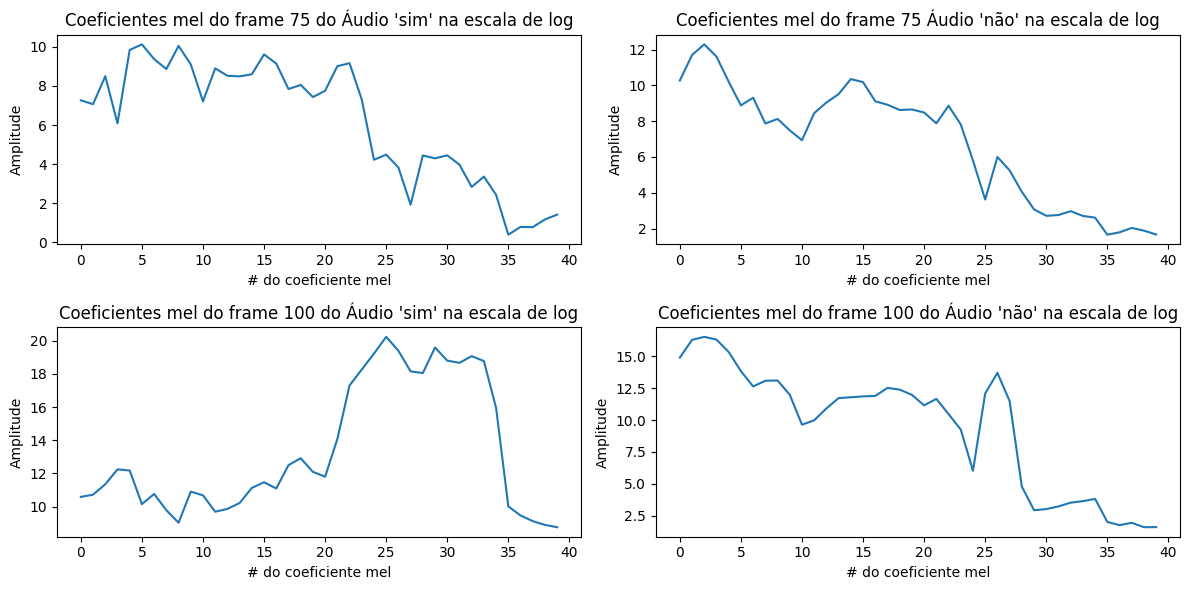

In [106]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(mel_axis, yes_mel_energy_log[75])
axis[0, 0].set_title("Coeficientes mel do frame 75 do Áudio 'sim' na escala de log")
axis[0, 0].set_xlabel("# do coeficiente mel")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(mel_axis, no_mel_energy_log[75])
axis[0, 1].set_title("Coeficientes mel do frame 75 Áudio 'não' na escala de log")
axis[0, 1].set_xlabel("# do coeficiente mel")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(mel_axis, yes_mel_energy_log[100])
axis[1, 0].set_title("Coeficientes mel do frame 100 do Áudio 'sim' na escala de log")
axis[1, 0].set_xlabel("# do coeficiente mel")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(mel_axis, no_mel_energy_log[100])
axis[1, 1].set_title("Coeficientes mel do frame 100 do Áudio 'não' na escala de log")
axis[1, 1].set_xlabel("# do coeficiente mel")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

O logaritmo das energias Mel foi calculado para aproximar a percepção auditiva humana, que responde de forma aproximadamente logarítmica à intensidade sonora.

Além disso, essa etapa transforma multiplicações no domínio espectral em somas, preparando os dados para a aplicação da Transformada Discreta do Cosseno (DCT). Os gráficos mostram uma maior compressão dinâmica, facilitando a comparação entre
diferentes bandas.

9. Calcule a Transformada Discreta do Cosseno (DCT) dos log da energia gerado na Questão 8. Pegue apenas os 16 primeiros parâmetros da DCT e ignore o restante. Gere o gráfico do MFCC para 1 frame de cada um dos 2 sinais (para os mesmos frames da Questão 3). É permitido usar função pronta para a DCT.

Calculado a DCT dos lof das energias

In [107]:
yes_MFCCs = dct(yes_mel_energy_log, norm = 'ortho')

In [108]:
no_MFCCs = dct(no_mel_energy_log, norm = 'ortho')

Considerando apenas os 16 primeiros coeficientes

In [109]:
yes_MFCCs = yes_MFCCs[:, :16]

In [110]:
no_MFCCs = no_MFCCs[:, :16]

Verificando os resultados

In [111]:
mel_truncated_axis = np.arange(16)

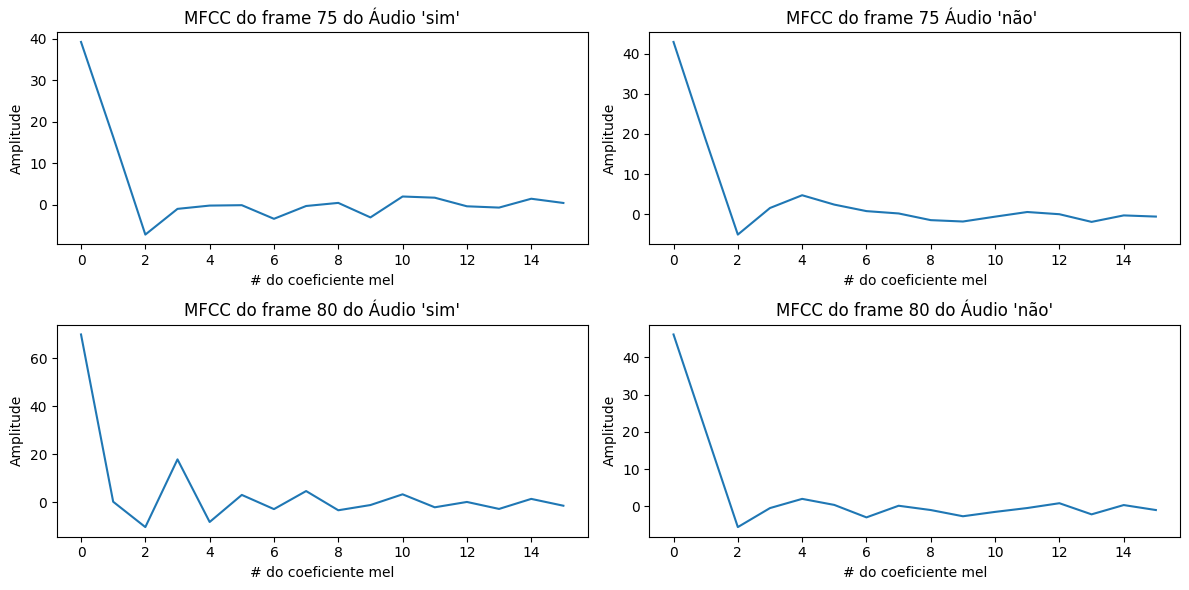

In [112]:
figure, axis = plt.subplots(2, 2, figsize = (12, 6))

axis[0, 0].plot(mel_truncated_axis, yes_MFCCs[75])
axis[0, 0].set_title("MFCC do frame 75 do Áudio 'sim'")
axis[0, 0].set_xlabel("# do coeficiente mel")
axis[0, 0].set_ylabel("Amplitude")

axis[0, 1].plot(mel_truncated_axis, no_MFCCs[75])
axis[0, 1].set_title("MFCC do frame 75 Áudio 'não' ")
axis[0, 1].set_xlabel("# do coeficiente mel")
axis[0, 1].set_ylabel("Amplitude")

axis[1, 0].plot(mel_truncated_axis, yes_MFCCs[80])
axis[1, 0].set_title("MFCC do frame 80 do Áudio 'sim'")
axis[1, 0].set_xlabel("# do coeficiente mel")
axis[1, 0].set_ylabel("Amplitude")

axis[1, 1].plot(mel_truncated_axis, no_MFCCs[80])
axis[1, 1].set_title("MFCC do frame 80 do Áudio 'não'")
axis[1, 1].set_xlabel("# do coeficiente mel")
axis[1, 1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

A Transformada Discreta do Cosseno (DCT) foi aplicada aos logaritmos das energias Mel para descorrelacionar os coeficientes e concentrar a maior parte da informação espectral nos primeiros coeficientes.

Apenas os 16 primeiros coeficientes foram mantidos, pois eles carregam a maior parte da informação relevante do sinal, enquanto os coeficientes de ordem mais alta tendem a representar detalhes finos ou ruído.

Os gráficos dos MFCC mostram padrões distintos entre os sinais "sim" e "não", reforçando seu potencial discriminativo.

10. Para cada um dos 2 sinais, concatene (junte) os MFCC de todos os frames (calculados na Questão 9) em um só vetor, formando um grande vetor com todos os MFCC de um mesmo sinal. A ideia principal deste trabalho é saber se este vetor com os todos os MFCC é uma ferramenta útil para caracterizar o sinal de áudio. Gere o gráfico deste vetor como todos os MFCC para os 2 sinais. Conclua se os MFCC podem funcionar como parâmetro para distinguir estes 2 sinais de áudio fornecidos.

Empilhando os coeficientes

In [113]:
yes_MFCC = np.hstack(yes_MFCCs)

yes_MFCC.shape

(2288,)

In [114]:
no_MFCC = np.hstack(no_MFCCs)

no_MFCC.shape

(2288,)

Verificando os resultados

In [115]:
MFCC_axis = np.arange(16 * frames_amout)

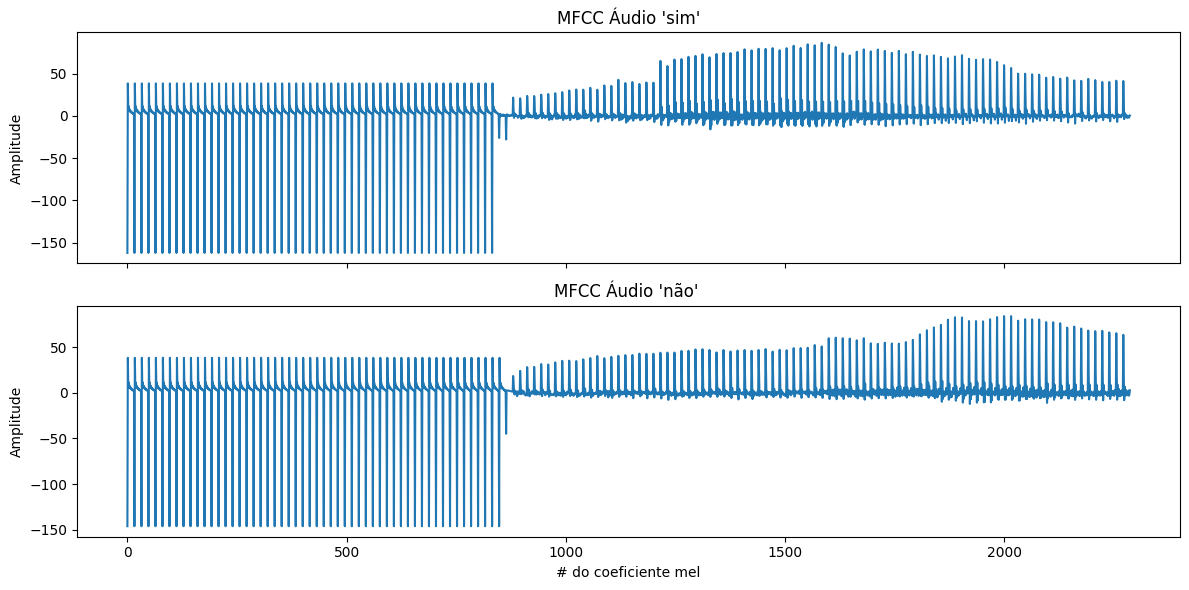

In [116]:
figure, axis = plt.subplots(2, 1, figsize = (12, 6), sharex = True)

axis[0].plot(MFCC_axis, yes_MFCC)
axis[0].set_title("MFCC Áudio 'sim'")
axis[0].set_ylabel("Amplitude")

axis[1].plot(MFCC_axis, no_MFCC)
axis[1].set_title("MFCC Áudio 'não' ")
axis[1].set_xlabel("# do coeficiente mel")
axis[1].set_ylabel("Amplitude")

plt.tight_layout()

plt.show()
plt.close()

A concatenação dos MFCC de todos os frames gera um vetor de características que representa globalmente o sinal de áudio. Esse vetor captura tanto informações espectrais quanto temporais da fala.

A comparação dos vetores concatenados dos sinais "sim" e "não" revela diferenças estruturais claras, indicando que os MFCC são capazes de caracterizar e distinguir eficientemente os dois sinais de voz fornecidos.

Portanto, conclui-se que os MFCC constituem uma ferramenta adequada e robusta para a caracterização e discriminação de sinais de fala.
